In [2]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
#Importing the dataframe using pandas

start_time = datetime.now() 
# insert the code here
df=pd.read_csv('/Users/anjaligarg/Data science/New York TAXI/new-york-city-taxi-fare-prediction/train.csv', nrows=2000000)
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:05.443447


In [4]:
start_time = datetime.now()
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'],infer_datetime_format=True)
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:09.344364


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   key                object        
 1   fare_amount        float64       
 2   pickup_datetime    datetime64[ns]
 3   pickup_longitude   float64       
 4   pickup_latitude    float64       
 5   dropoff_longitude  float64       
 6   dropoff_latitude   float64       
 7   passenger_count    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 122.1+ MB
None


In [6]:
print(df.describe())

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  2.000000e+06      2.000000e+06     2.000000e+06       1.999986e+06   
mean   1.134779e+01     -7.252321e+01     3.992963e+01      -7.252395e+01   
std    9.852883e+00      1.286804e+01     7.983352e+00       1.277497e+01   
min   -6.200000e+01     -3.377681e+03    -3.458665e+03      -3.383297e+03   
25%    6.000000e+00     -7.399208e+01     4.073491e+01      -7.399141e+01   
50%    8.500000e+00     -7.398181e+01     4.075263e+01      -7.398016e+01   
75%    1.250000e+01     -7.396713e+01     4.076710e+01      -7.396369e+01   
max    1.273310e+03      2.856442e+03     2.621628e+03       3.414307e+03   

       dropoff_latitude  passenger_count  
count      1.999986e+06     2.000000e+06  
mean       3.992808e+01     1.684113e+00  
std        1.032382e+01     1.314982e+00  
min       -3.461541e+03     0.000000e+00  
25%        4.073400e+01     1.000000e+00  
50%        4.075312e+01     1.000000e+00  
75%  

In [7]:
print(df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
dtype: int64


In [8]:
df = df.dropna(axis =0)

In [9]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [10]:
print("Number of rows where fare less than 0 are ",len(df[df['fare_amount']<=0]))
print("Maximum value of fare ",df['fare_amount'].max())
print("Number of rows where less than equal to 0 passenger ",len(df[df['passenger_count']<=0]))
print("Maximum number of passenger in a trip ",df['passenger_count'].max())
print("Starting Day in Data",df['pickup_datetime'].min())
print("End Day in Data ",df['pickup_datetime'].max())

Number of rows where fare less than 0 are  133
Maximum value of fare  1273.31
Number of rows where less than equal to 0 passenger  7109
Maximum number of passenger in a trip  208
Starting Day in Data 2009-01-01 00:00:46
End Day in Data  2015-06-30 23:53:49


In [11]:
df.drop(df[df['fare_amount']<=0].index,inplace=True)

In [12]:
df.drop(df[df['passenger_count']==208].index,inplace=True)
df.drop(df[df['passenger_count']==9].index,inplace=True)

In [13]:
df["passenger_count"].replace({0: np.nan}, inplace=True)

In [14]:
df["passenger_count"].fillna(df["passenger_count"].value_counts().index[0],inplace=True)

## Issue with Geographical Data : 
### 1.Wrong latitude and longitude -> Delete the data  (~120)
### 2. Geographical information 0  -> Checked the matching fare_amount 
###     2.a -> No matching fare_amount -> Delete the rowa (71)
### 3. Same pick up and drop Geographical Data -> ?

## Latitude and longitude are a pair of numbers (coordinates) used to describe a position on the plane of a geographic coordinate system. The numbers are in decimal degrees format and range from -90 to 90 for latitude and -180 to 180 for longitude.

In [15]:
print(len(df[(df['pickup_latitude']<=-90 ) |  (df['pickup_latitude']>=90)]['pickup_latitude']))
print(len(df[(df['dropoff_latitude']<=-90 ) |  (df['dropoff_latitude']>=90)]['dropoff_latitude']))
print(len(df[(df['pickup_longitude']<=-180 ) |  (df['pickup_longitude']>=180)]['pickup_longitude']))
print(len(df[(df['dropoff_longitude']<=-180 ) |  (df['dropoff_longitude']>=180)]['dropoff_longitude']))

33
34
38
36


In [16]:
df.drop(df[(df['pickup_latitude']<=-90 ) | (df['pickup_latitude']>=90)].index,inplace=True)

In [17]:
df.drop(df[(df['dropoff_latitude']<=-90 ) | (df['dropoff_latitude']>=90)].index,inplace=True)

In [18]:
df.drop(df[(df['pickup_longitude']<=-90 ) | (df['pickup_longitude']>=90)].index,inplace=True)

In [19]:
df.drop(df[(df['dropoff_longitude']<=-90 ) | (df['dropoff_longitude']>=90)].index,inplace=True)

In [20]:
print(len(df[(df['pickup_latitude']<=-90 ) |  (df['pickup_latitude']>=90)]['pickup_latitude']))
print(len(df[(df['dropoff_latitude']<=-90 ) |  (df['dropoff_latitude']>=90)]['dropoff_latitude']))
print(len(df[(df['pickup_longitude']<=-180 ) |  (df['pickup_longitude']>=180)]['pickup_longitude']))
print(len(df[(df['dropoff_longitude']<=-180 ) |  (df['dropoff_longitude']>=180)]['dropoff_longitude']))

0
0
0
0


In [21]:
print("Legth after dropping ",len(df))

Legth after dropping  1999756


In [22]:
df.drop(df[((df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) | (df['pickup_longitude']==0)) & (df.fare_amount ==0)].index, inplace=True,axis=0)

In [23]:
len(df[((df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) | (df['pickup_longitude']==0)) & (df.fare_amount ==0)])

0

In [24]:
print("Legth after dropping ",len(df))

Legth after dropping  1999756


In [25]:
print(len(df[df['fare_amount']==0]))

0


## Pending -> Deal with data having same pick up and drop Location 

In [26]:
dfL = df[(df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) | (df['pickup_longitude']==0)]

In [27]:
print("Length of New Dataframe ",len(dfL))
listOfAmount = dfL.fare_amount.unique()
print("Length of List",len(listOfAmount))

Length of New Dataframe  39411
Length of List 747


## Deleting Rows from Df where geographical info is 0 after sending them to new datafra,e

In [28]:
df.drop(df[(df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) | (df['pickup_longitude']==0)].index, inplace=True,axis=0)

In [29]:
len(df[(df['pickup_latitude']==0) | (df['dropoff_longitude']==0) | (df['dropoff_latitude']==0) | (df['pickup_longitude']==0)])

0

## Logic to populate new dfL with geograpical info by matching fare_amount with df

In [30]:
start_time = datetime.now()
listOfPriceNotPresent = []
for price in listOfAmount: 
    #print('Price is ',price)
    g = df[df.fare_amount == price][['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
    #print("Length of g ",len(g))
    if len(g)>0:
        g['count']=0
        h=[]
        h = g.groupby(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']).count()
        h=h.add_suffix('_count').reset_index()
        #print(h)
        listOf = h.sort_values('count_count', ascending=False).iloc[0]
        dfL.loc[dfL['fare_amount']==price,'pickup_latitude'] = listOf.pickup_latitude
        dfL.loc[dfL['fare_amount']==price,'dropoff_longitude'] = listOf.dropoff_longitude
        dfL.loc[dfL['fare_amount']==price,'dropoff_latitude'] = listOf.dropoff_latitude
        dfL.loc[dfL['fare_amount']==price,'pickup_longitude'] = listOf.pickup_longitude
    else:
        listOfPriceNotPresent.append(price)
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
    #print("list Of",listOf)
    

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Time elapsed (hh:mm:ss.ms) 0:00:24.905035


In [31]:
print(len(listOfPriceNotPresent))


65


In [32]:
len(dfL[(dfL['pickup_latitude']==0 ) |  (dfL['dropoff_longitude']==0) | (dfL['dropoff_latitude']==0) | (dfL['pickup_longitude']==0)])

70

## There are 71 rows for which no matching fare amount found

In [33]:
dfL.drop(dfL[(dfL['pickup_latitude']==0) | (dfL['dropoff_longitude']==0) | (dfL['dropoff_latitude']==0) | (dfL['pickup_longitude']==0)].index, inplace=True,axis=0)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Appending the dataframe

In [34]:
print(len(dfL))
print(len(df))
df=df.append(dfL, ignore_index = True) 
print(len(df))
dfL=[]

39341
1960345
1999686


In [35]:
print("Number of rows where fare less than 0 are ",len(df[df['fare_amount']<=0]))
print("Maximum value of fare ",df['fare_amount'].max())
print("Number of rows where less than equal to 0 passenger ",len(df[df['passenger_count']<=0]))
print("Maximum number of passenger in a trip ",df['passenger_count'].max())
print("Starting Day in Data",df['pickup_datetime'].min())
print("End Day in Data ",df['pickup_datetime'].max())

Number of rows where fare less than 0 are  0
Maximum value of fare  500.0
Number of rows where less than equal to 0 passenger  0
Maximum number of passenger in a trip  6.0
Starting Day in Data 2009-01-01 00:00:46
End Day in Data  2015-06-30 23:53:49


In [36]:
"""
from datetime import datetime;
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
   
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6371* c
    return km
start_time = datetime.now()
df['distance-apply']=df.apply(lambda row:haversine(row['pickup_longitude'],row['pickup_latitude'],row['dropoff_longitude'],row['dropoff_latitude']),axis=1)
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
"""

"\nfrom datetime import datetime;\nfrom math import radians, cos, sin, asin, sqrt\ndef haversine(lon1, lat1, lon2, lat2):\n   \n    # convert decimal degrees to radians \n    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])\n    # haversine formula \n    dlon = lon2 - lon1 \n    dlat = lat2 - lat1 \n    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2\n    c = 2 * np.arcsin(np.sqrt(a)) \n    km = 6371* c\n    return km\nstart_time = datetime.now()\ndf['distance-apply']=df.apply(lambda row:haversine(row['pickup_longitude'],row['pickup_latitude'],row['dropoff_longitude'],row['dropoff_latitude']),axis=1)\ntime_elapsed = datetime.now() - start_time \nprint('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))\n"

In [37]:
"""
import numpy as np

# Define a basic Haversine distance formula
def haversine(lat1, lon1, lat2, lon2):
    #MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6371* c
    return km
start_time = datetime.now()
df['distance-pandas-vector'] = haversine( df['pickup_latitude'], df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
"""

"\nimport numpy as np\n\n# Define a basic Haversine distance formula\ndef haversine(lat1, lon1, lat2, lon2):\n    #MILES = 3959\n    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])\n    dlat = lat2 - lat1 \n    dlon = lon2 - lon1 \n    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2\n    c = 2 * np.arcsin(np.sqrt(a)) \n    km = 6371* c\n    return km\nstart_time = datetime.now()\ndf['distance-pandas-vector'] = haversine( df['pickup_latitude'], df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])\ntime_elapsed = datetime.now() - start_time \nprint('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))\n"

In [38]:
anjaliimport numpy as np

# Define a basic Haversine distance formula
def haversine(lat1, lon1, lat2, lon2):
    #MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6371* c
    return km
start_time = datetime.now()
df['distance-numpy_vector'] = haversine( df['pickup_latitude'].values, df['pickup_longitude'].values,df['dropoff_latitude'].values,df['dropoff_longitude'].values)
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms) 0:00:00.371847


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999686 entries, 0 to 1999685
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   key                    object        
 1   fare_amount            float64       
 2   pickup_datetime        datetime64[ns]
 3   pickup_longitude       float64       
 4   pickup_latitude        float64       
 5   dropoff_longitude      float64       
 6   dropoff_latitude       float64       
 7   passenger_count        float64       
 8   distance-numpy_vector  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 137.3+ MB
None


In [40]:
df.loc[(df['pickup_datetime'].dt.hour>4) & (df['pickup_datetime'].dt.hour<=8),'session'] = 'EarlyMorning'
df.loc[(df['pickup_datetime'].dt.hour>8) & (df['pickup_datetime'].dt.hour<=12),'session'] = 'Morning'
df.loc[(df['pickup_datetime'].dt.hour>12) & (df['pickup_datetime'].dt.hour<=16),'session'] = 'Noon'
df.loc[(df['pickup_datetime'].dt.hour>16) & (df['pickup_datetime'].dt.hour<=20),'session'] = 'Evening'
df.loc[(df['pickup_datetime'].dt.hour>20) & (df['pickup_datetime'].dt.hour<=24),'session'] = 'Night'
df.loc[(df['pickup_datetime'].dt.hour<=4),'session'] ='Late-Night'
print(df['session'].unique())

['Evening' 'Noon' 'Late-Night' 'EarlyMorning' 'Morning' 'Night']


In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999686 entries, 0 to 1999685
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   key                    object        
 1   fare_amount            float64       
 2   pickup_datetime        datetime64[ns]
 3   pickup_longitude       float64       
 4   pickup_latitude        float64       
 5   dropoff_longitude      float64       
 6   dropoff_latitude       float64       
 7   passenger_count        float64       
 8   distance-numpy_vector  float64       
 9   session                object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 152.6+ MB
None


# Deleting outliers for Fare Amount and Distance

In [42]:
Q1 = df[["fare_amount"]].quantile(0.25)
Q3 = df[["fare_amount"]].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
value = Q3 + 1.5 * IQR
print("value ",value[0])
print(len(df[df['fare_amount'] > value[0]]))
df.drop(df[df['fare_amount'] > 22.25].index,axis=0,inplace=True)
Q1 = df[["fare_amount"]].quantile(0.25)
Q3 = df[["fare_amount"]].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
value = Q3 + 1.5 * IQR
print("value ",value[0])
print(len(df[df['fare_amount'] > value[0]]))
df.drop(df[df['fare_amount'] > 22.25].index,axis=0,inplace=True)

fare_amount    12.5
Name: 0.75, dtype: float64
value  22.25
172302
fare_amount    11.0
Name: 0.75, dtype: float64
value  18.95
57455


In [43]:
anjali gargQ1 = df[["distance-numpy_vector"]].quantile(0.25)
Q3 = df[["distance-numpy_vector"]].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
value = Q3 + 1.5 * IQR
print("value ",value[0])
print(len(df[df['distance-numpy_vector'] > value[0]]))
df.drop(df[df['distance-numpy_vector'] > value[0]].index,axis=0,inplace=True)

distance-numpy_vector    3.278536
Name: 0.75, dtype: float64
value  6.456297015695855
80702


# Adding year and month column 

In [44]:
anjali gargdf['Year'] =''
df['Month'] =''
df['Year'] = (df['pickup_datetime'].dt.year)
print(df['Year'])
df['Month'] = (df['pickup_datetime'].dt.month)

0          2009
2          2011
3          2012
4          2010
5          2011
           ... 
1999680    2011
1999682    2012
1999683    2012
1999684    2010
1999685    2015
Name: Year, Length: 1746682, dtype: int64


# Adding Holiday 

In [45]:
anjali gargimport holidays
us_holidays=[]
for date in  holidays.CountryHoliday('US', prov=None, state='New York',years=[2009,2010,2011,2012,2013,2014,2015]).items():
    print(date[0])
    us_holidays.append(str(date[0]))
#print(us_holidays,end=', ')

2009-01-01
2009-01-19
2009-02-16
2009-05-25
2009-07-04
2009-07-03
2009-09-07
2009-10-12
2009-11-11
2009-11-26
2009-12-25
2010-01-01
2010-12-31
2010-01-18
2010-02-15
2010-05-31
2010-07-04
2010-07-05
2010-09-06
2010-10-11
2010-11-11
2010-11-25
2010-12-25
2010-12-24
2011-01-01
2011-01-17
2011-02-21
2011-05-30
2011-07-04
2011-09-05
2011-10-10
2011-11-11
2011-11-24
2011-12-25
2011-12-26
2012-01-01
2012-01-02
2012-01-16
2012-02-20
2012-05-28
2012-07-04
2012-09-03
2012-10-08
2012-11-11
2012-11-12
2012-11-22
2012-12-25
2013-01-01
2013-01-21
2013-02-18
2013-05-27
2013-07-04
2013-09-02
2013-10-14
2013-11-11
2013-11-28
2013-12-25
2014-01-01
2014-01-20
2014-02-17
2014-05-26
2014-07-04
2014-09-01
2014-10-13
2014-11-11
2014-11-27
2014-12-25
2015-01-01
2015-01-19
2015-02-16
2015-05-25
2015-07-04
2015-07-03
2015-09-07
2015-10-12
2015-11-11
2015-11-26
2015-12-25


In [46]:
df['n_holiday'] = [1 if str(val).split()[0] in us_holidays else 0 for val in df['pickup_datetime']]
df['Holiday'] = df['pickup_datetime'].dt.weekday
df['Holiday'] = [1 if val>=5 else 0 for val in df['Holiday']]
df['Holiday'] = df['Holiday']+df['n_holiday']
df['Holiday'] = [1 if val>=1 else 0 for val in df['Holiday']]
df.drop(columns='n_holiday',axis=1,inplace=True)

In [47]:
print(df.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance-numpy_vector', 'session', 'Year', 'Month',
       'Holiday'],
      dtype='object')


# EDA

## Fare

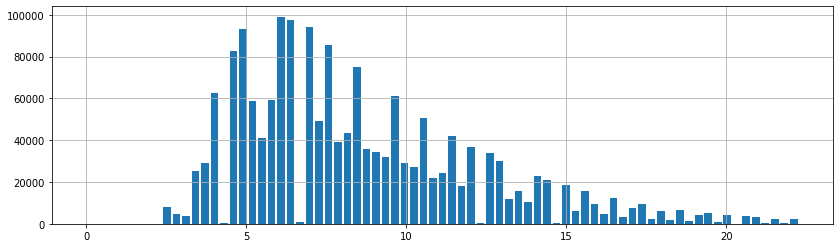

In [48]:
df['fare_amount'].hist(bins=75, rwidth=.8, figsize=(14,4))
#plt.title('Fares')
plt.show()

In [49]:
print(df['fare_amount'].value_counts(bins=75,ascending=True))

(0.307, 0.603]        0
(0.603, 0.9]          0
(0.9, 1.196]          0
(1.196, 1.493]        0
(1.493, 1.789]        0
                  ...  
(7.423, 7.72]     85531
(4.755, 5.051]    93280
(6.83, 7.127]     94230
(6.237, 6.534]    97567
(5.941, 6.237]    99098
Name: fare_amount, Length: 75, dtype: int64


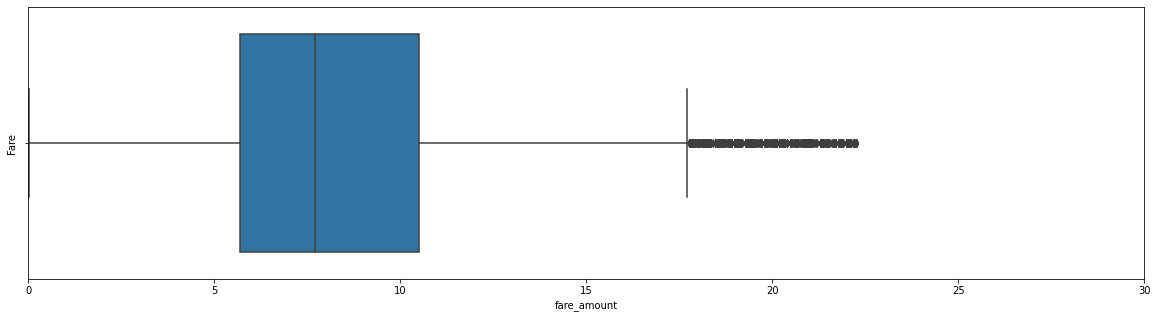

In [50]:
anjali gargplt.figure(figsize=(20,5))
plt.xlim(0,30)
plt.ylabel('Fare')
sns.boxplot(x=df['fare_amount'])
plt.show()

In [51]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance-numpy_vector', 'session', 'Year', 'Month',
       'Holiday'],
      dtype='object')

# Fare

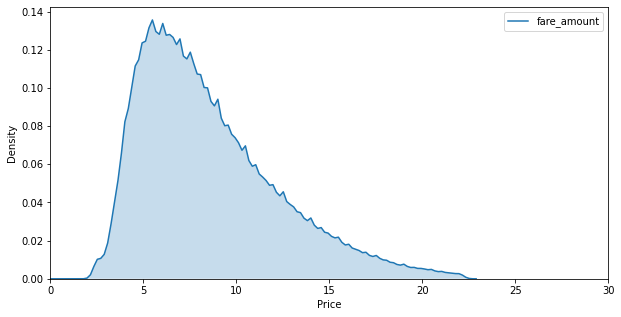

In [52]:
plt.figure(figsize=(10,5))
plt.xlim(0,30)
plt.xlabel('Price')
plt.ylabel('Density')
sns.kdeplot(df['fare_amount'],shade=True)
plt.show()

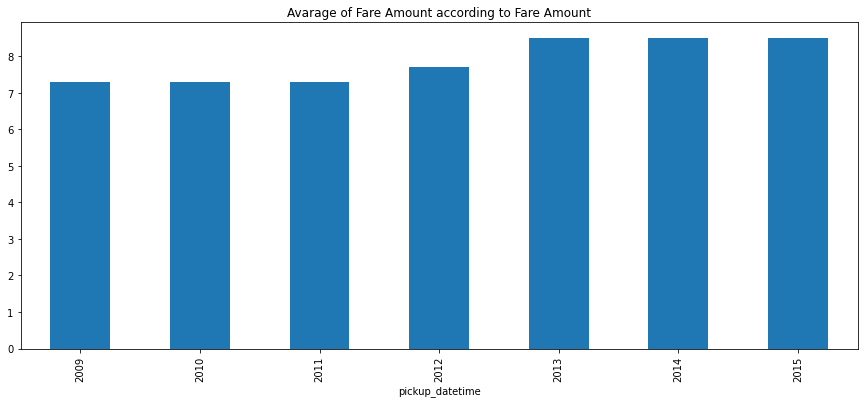

In [53]:
df.groupby(df.pickup_datetime.dt.year).fare_amount.median().plot(kind='bar', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Fare Amount')
plt.show()

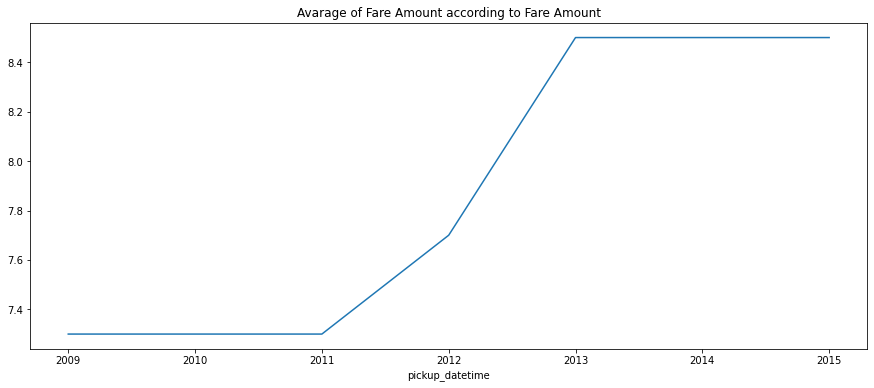

In [54]:
df.groupby(df.pickup_datetime.dt.year).fare_amount.median().plot(kind='line', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Fare Amount')
plt.show()

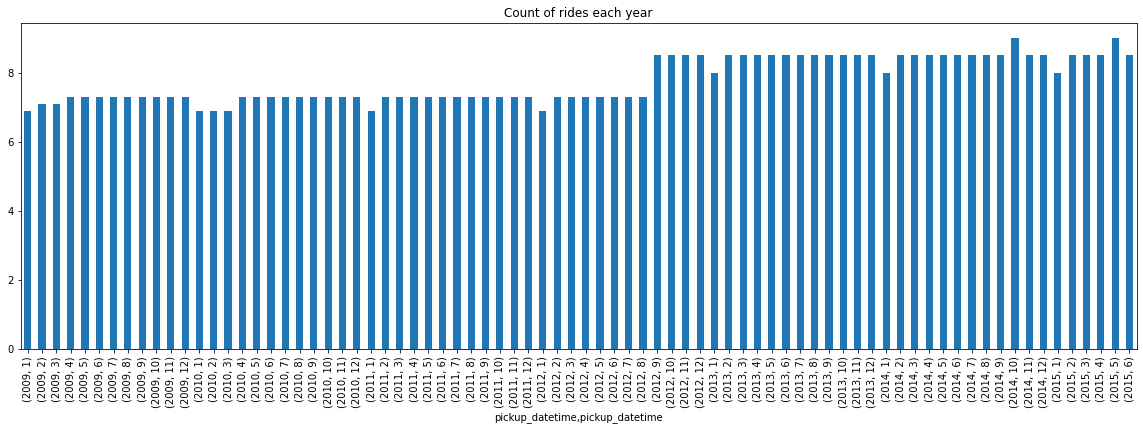

In [55]:
df.groupby([df.pickup_datetime.dt.year,df.pickup_datetime.dt.month]).fare_amount.median().plot(kind='bar', figsize=(20,6))
plt.title('Count of rides each year')
plt.show()

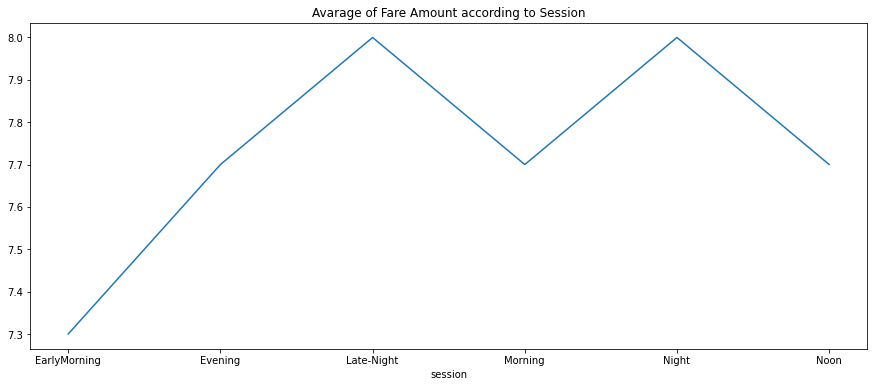

In [56]:
df.groupby(df.session).fare_amount.median().plot(kind='line', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Session')
plt.show()

## Passenger 

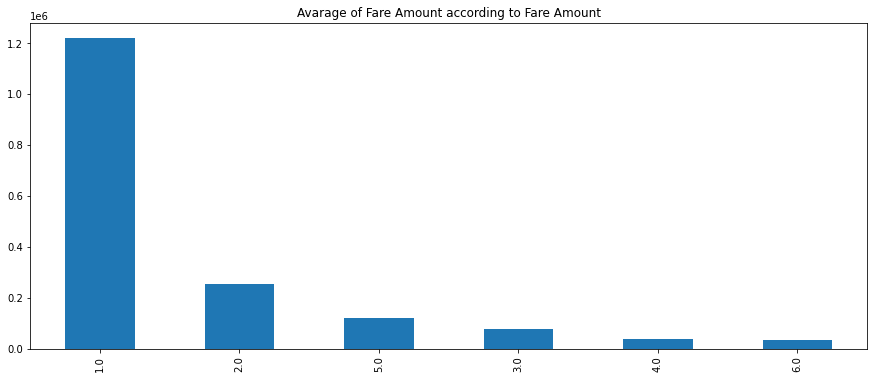

In [57]:
df.passenger_count.value_counts().plot(kind='bar', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Fare Amount')
plt.show()

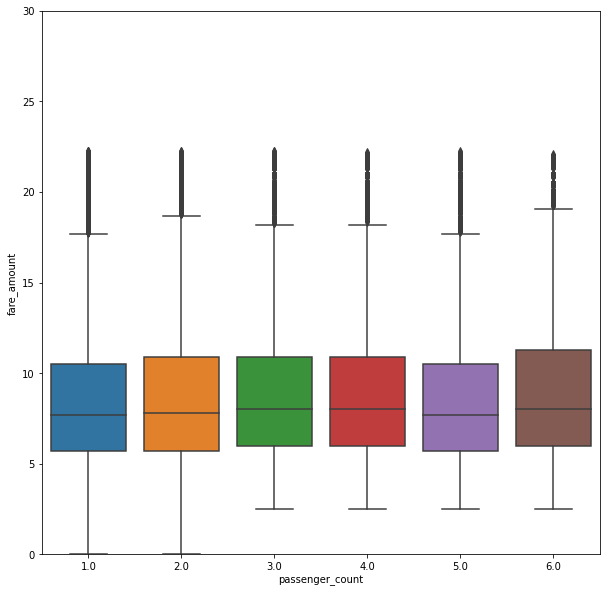

In [58]:
plt.figure(figsize=(10,10))
plt.ylim(0,30)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='passenger_count' , y ='fare_amount',data = df)
plt.show()

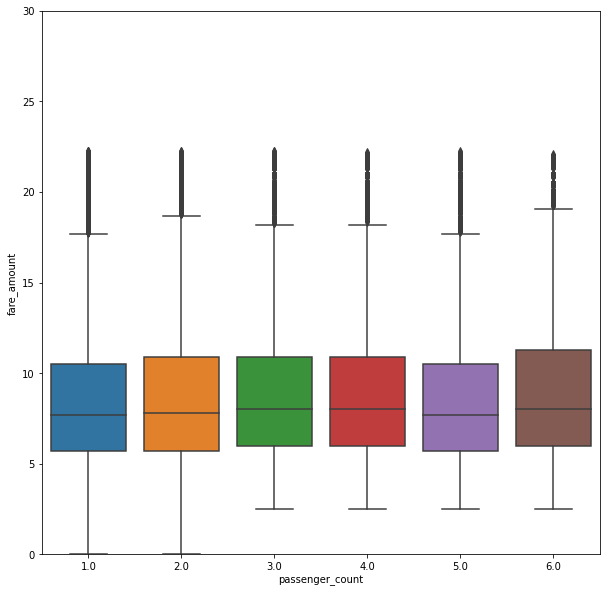

In [59]:
plt.figure(figsize=(10,10))
plt.ylim(0,30)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='passenger_count' , y ='fare_amount',data = df)
plt.show()

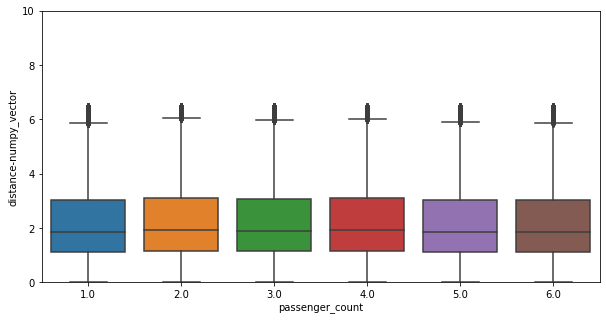

In [60]:
plt.figure(figsize=(10,5))
plt.ylim(0,10)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='passenger_count' , y ='distance-numpy_vector',data = df)
plt.show()

# Session

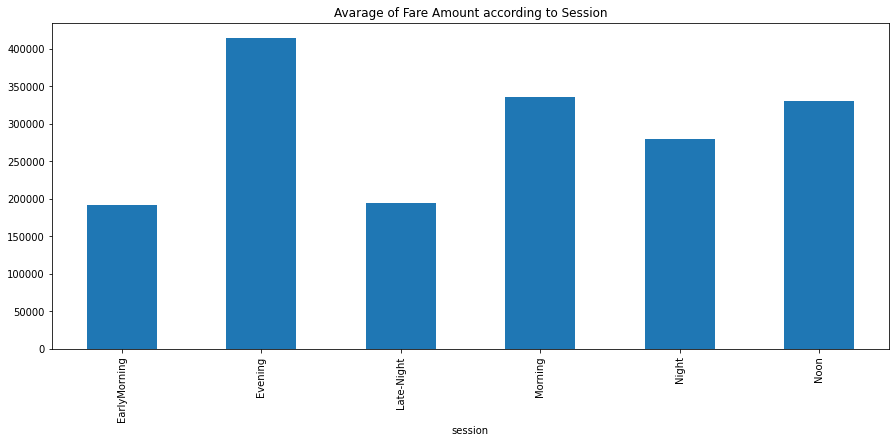

In [61]:
df.groupby(df.session).fare_amount.count().plot(kind='bar', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Session')
plt.show()

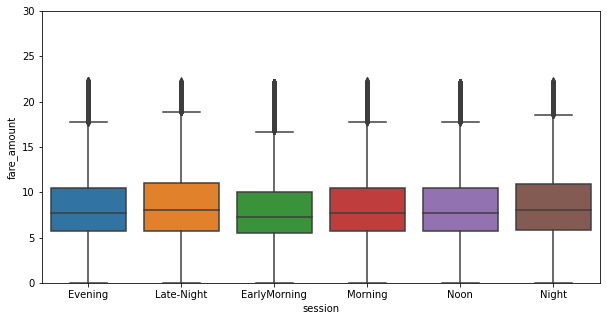

In [62]:
plt.figure(figsize=(10,5))
plt.ylim(0,30)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='session' , y ='fare_amount',data = df)
plt.show()

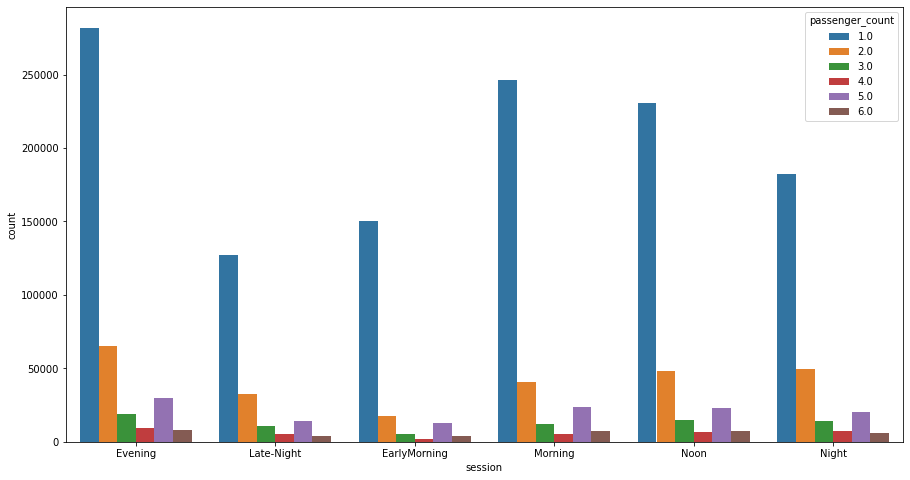

In [63]:
plt.figure(figsize=(15,8))
sns.countplot(x='session', hue='passenger_count', data=df)
plt.show()


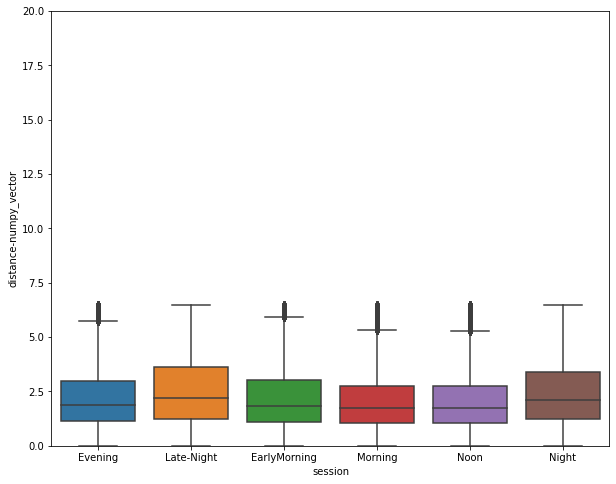

In [64]:
plt.figure(figsize=(10,8))
plt.ylim(0,20)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='session' , y ='distance-numpy_vector',data = df)
plt.show()

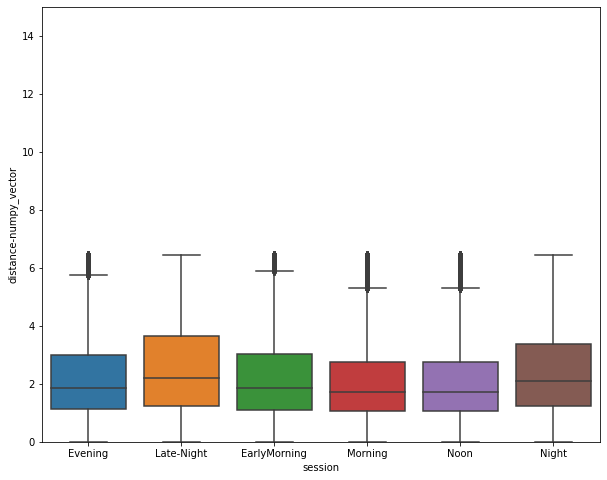

In [65]:
plt.figure(figsize=(10,8))
plt.ylim(0,15)
#plt.ylim(0,700)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='session' , y ='distance-numpy_vector',data = df)
plt.show()

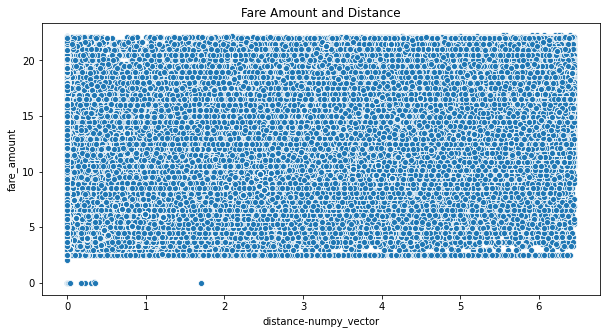

In [66]:
plt.figure(figsize=(10,5))
#plt.ylim(0,15)
#plt.ylim(0,700)
plt.title('Fare Amount and Distance')
data = df
sns.scatterplot(data['distance-numpy_vector'],data['fare_amount'])
plt.show()

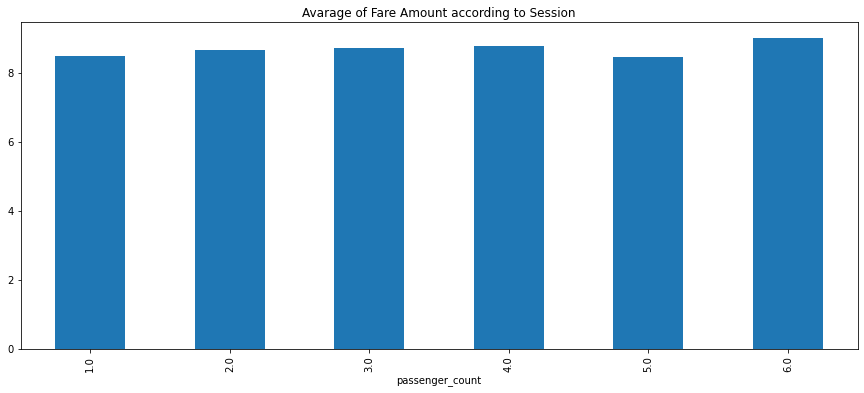

In [67]:
df.groupby(df.passenger_count).fare_amount.mean().plot(kind='bar', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Session')
plt.show()




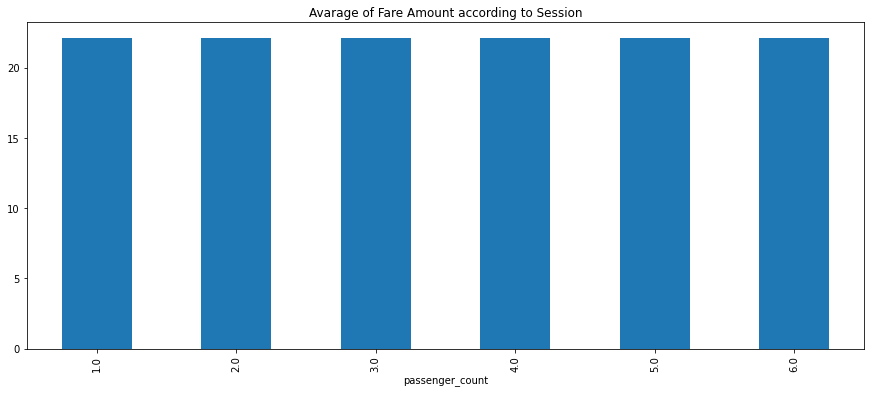

In [68]:
df[df['fare_amount']>22].groupby(df.passenger_count).fare_amount.mean().plot(kind='bar', figsize=(15,6))
plt.title('Avarage of Fare Amount according to Session')
plt.show()

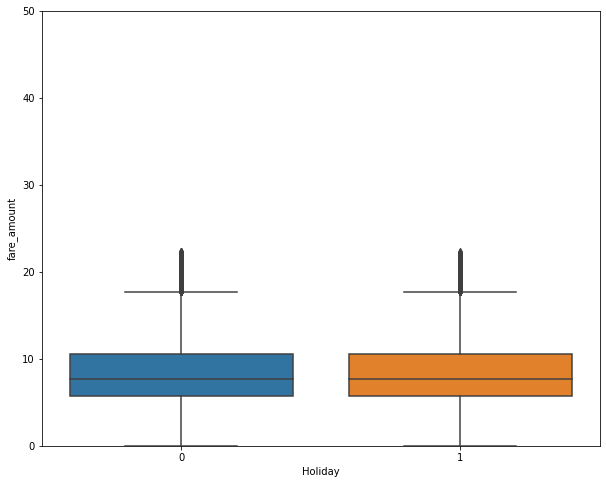

In [69]:
plt.figure(figsize=(10,8))

plt.ylim(0,50)
#plt.ylabel('Price')
#plt.ylabel('')
#data = df[['fare_amount','passenger_count']]
sns.boxplot(x ='Holiday' , y ='fare_amount',data = df)
plt.show()

# Modelling

In [70]:
X=[]
X = df[['fare_amount','distance-numpy_vector','session','Holiday','passenger_count','Year','Month']]

In [71]:
feature_cols = ['distance-numpy_vector', 'session', 'passenger_count',
       'Year', 'Month', 'Holiday_0', 'Holiday_1']
y = X['fare_amount']
X.drop('fare_amount', axis=1, inplace=True)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
print(feature_cols)

['distance-numpy_vector', 'session', 'passenger_count', 'Year', 'Month', 'Holiday_0', 'Holiday_1']


## Train test split

In [73]:
# Split data intro train and validation sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Shapes
X_train: (1222677, 6)
X_test: (524005, 6)
y_train: (1222677,)
y_test: (524005,)


In [74]:
X_train.session.replace({'Evening':4, 'Late-Night':6, 'EarlyMorning':1, 'Morning':2, 'Night':5,'Noon':3}, inplace=True)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [75]:
X_test.session.replace({'Evening':4, 'Late-Night':6, 'EarlyMorning':1, 'Morning':2, 'Night':5,'Noon':3}, inplace=True)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [76]:
print(X.Year.unique())

[2009 2011 2012 2010 2013 2014 2015]


In [77]:
X_train.Year.replace({2009:1,2010:2, 2011:3, 2012:4, 2013:5,2014:6,2015:7}, inplace=True)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [78]:
X_test.Year.replace({2009:1,2010:2, 2011:3, 2012:4, 2013:5,2014:6,2015:7}, inplace=True)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [79]:
print(X_train.Year.unique())

[2 5 1 7 4 6 3]


In [80]:
X_train['passenger_count'] = X_train['passenger_count'].astype(float)
X_train['passenger_count'] = X_train['passenger_count'].astype(int)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
X_test['passenger_count'] = X_test['passenger_count'].astype(float)
X_test['passenger_count'] = X_test['passenger_count'].astype(int)

/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anjaligarg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(X_train[['Holiday']]).toarray())
# merge with main df X_train on key values
X_train = X_train.join(enc_df)
X_train
"""

"\nimport pandas as pd\nimport numpy as np\nfrom sklearn.preprocessing import OneHotEncoder\n# creating instance of one-hot-encoder\nenc = OneHotEncoder(handle_unknown='ignore')\nenc_df = pd.DataFrame(enc.fit_transform(X_train[['Holiday']]).toarray())\n# merge with main df X_train on key values\nX_train = X_train.join(enc_df)\nX_train\n"

In [83]:
X_train = pd.get_dummies(X_train,prefix=['Holiday'],columns=['Holiday'])


In [84]:
X_test = pd.get_dummies(X_test,prefix=['Holiday'],columns=['Holiday'])

In [85]:
print(X_train.Holiday_1.unique())

[1 0]


In [86]:
X_train.columns

Index(['distance-numpy_vector', 'session', 'passenger_count', 'Year', 'Month',
       'Holiday_0', 'Holiday_1'],
      dtype='object')

In [87]:
print(X_train)

         distance-numpy_vector  session  passenger_count  Year  Month  \
945806                1.590662        4                1     2      4   
1859768               2.047176        4                2     5      2   
1061354               1.961546        4                1     1      6   
1381686               1.812159        5                2     7      5   
122022                2.814551        5                1     7      3   
...                        ...      ...              ...   ...    ...   
296824                3.901961        2                1     5      9   
1619577               2.322949        2                1     3      7   
151109                1.627125        4                1     4      9   
768689                4.499561        3                1     4      9   
139683                2.593292        5                1     2      9   

         Holiday_0  Holiday_1  
945806           0          1  
1859768          1          0  
1061354          1         

# Min Max Scaling

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
from sklearn.model_selection import train_test_split
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(X_train)
# transform the test test
X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
X_scaled = pd.DataFrame(data=X_scaled[0:,0:],    # values
             columns=X_train.columns)

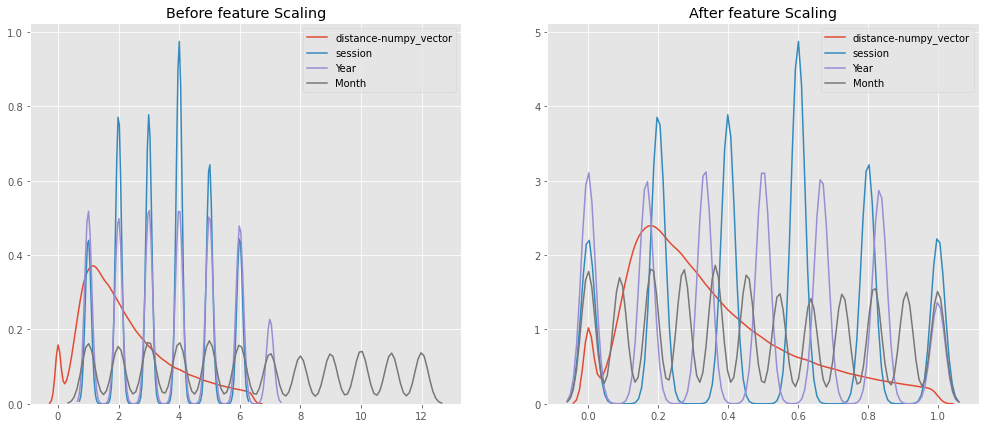

In [91]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
np.random.seed(1)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(17, 7))
ax1.set_title('Before feature Scaling')
sns.kdeplot(X_train['distance-numpy_vector'], ax=ax1)
sns.kdeplot(X_train['session'], ax=ax1)
sns.kdeplot(X_train['Year'], ax=ax1)
sns.kdeplot(X_train['Month'], ax=ax1)
ax2.set_title('After feature Scaling')
sns.kdeplot(X_scaled['distance-numpy_vector'], ax=ax2)
sns.kdeplot(X_scaled['session'], ax=ax2)
sns.kdeplot(X_scaled['Year'], ax=ax2)
sns.kdeplot(X_scaled['Month'], ax=ax2)
plt.show()

In [92]:
X_scaled=[]
from sklearn.model_selection import train_test_split
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(X_train)
# transform the test test
X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# OLS and LR

In [93]:
import statsmodels.api as sm
result = sm.OLS(y_train, X_scaled).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 3.212e+05
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:16:53   Log-Likelihood:            -2.7634e+06
No. Observations:             1222677   AIC:                         5.527e+06
Df Residuals:                 1222670   BIC:                         5.527e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.6258      0.009   1350.723      0.0

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [95]:
lr = LinearRegression()
lr.fit(X_scaled, y_train)
y_pred_test = lr.predict(X_test) 
y_pred_train =lr.predict(X_scaled) 

In [96]:
print('Intercept:',lr.intercept_)                                            
print('Coefficients:',lr.coef_)

Intercept: 2588884434008.9434
Coefficients: [ 1.26256827e+01 -4.02255696e-01  1.87928323e-01  2.11420290e+00
  5.63161611e-01 -2.58888443e+12 -2.58888443e+12]


In [97]:
feature_cols.insert(0,'Intercept')
coef = lr.coef_.tolist()
coef.insert(0, lr.intercept_)
eq1 = zip(feature_cols, coef)
for c1,c2 in eq1:
    print(c1,c2)

Intercept 2588884434008.9434
distance-numpy_vector 12.625682681231478
session -0.40225569565171215
passenger_count 0.18792832321742406
Year 2.114202901505858
Month 0.5631616105434879
Holiday_0 -2588884434005.7085
Holiday_1 -2588884434005.9873


In [98]:
from sklearn import metrics
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 2.3191382080497513
RMSE for test set is 5.968852000345731


In [99]:
from sklearn.model_selection import KFold
model = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=folds)
grid.fit(X_scaled, y_train)
print("r2 / variance : ", grid.best_score_)
print(grid.best_params_)

r2 / variance :  0.6118339975446556
{'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [100]:
df1 = pd.DataFrame({'Actual': y_train.values.flatten(), 'Predicted': y_pred_train.flatten()})
print(df1)

         Actual  Predicted
0           6.1   6.331543
1           7.0   8.495117
2           6.9   7.085449
3           6.5   8.534668
4           7.5  10.633789
...         ...        ...
1222672    10.5  12.604004
1222673     5.3   8.708984
1222674     7.0   7.642090
1222675    17.5  13.339844
1222676     8.5   8.746582

[1222677 rows x 2 columns]


In [101]:
import statsmodels.api as sm
result = sm.OLS(y_train, X_scaled).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 3.212e+05
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:17:10   Log-Likelihood:            -2.7634e+06
No. Observations:             1222677   AIC:                         5.527e+06
Df Residuals:                 1222670   BIC:                         5.527e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.6258      0.009   1350.723      0.0

In [102]:
print('R2: ', result.rsquared)

R2:  0.6118397933269089


In [103]:
from sklearn.svm import SVR

In [104]:
"""
regressor = SVR(kernel='rbf')
regressor.fit(X_scaled,y_train)
"""

"\nregressor = SVR(kernel='rbf')\nregressor.fit(X_scaled,y_train)\n"

# Linear Regression from Kaggle notebook 
https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration

In [ ]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [ ]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Decision Tree Regression

In [105]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_scaled, y_train)

DecisionTreeRegressor(random_state=0)

In [106]:
y_pred_train_dt = regressor.predict(X_scaled) 
y_pred_test_dt = regressor.predict(X_test) 

In [107]:
from sklearn import metrics
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_dt))
    RMSE_test =  np.sqrt( metrics.mean_squared_error(y_test, y_pred_test_dt))
    print('RMSE for training set in Decision Tree is {}'.format(RMSE_train))
    print('RMSE for test set  in Decisioj Tree is {}'.format(RMSE_test))
lr()

RMSE for training set in Decision Tree is 0.5941206445699783
RMSE for test set  in Decisioj Tree is 6.420639521340853


# Post Pruning

### The DecisionTreeClassifier and Regressor class in sklearn provides a pruning parameter : ccp_alphas .

### The process of pruning continues until the minimal effective alpha of the pruned tree is not greater than ccp_alpha .

### The DecisionTreeClassifier class also provides a method cost_complexity_pruning_path which implements the pruning process and returns the effective alphas(and the corresponding impurities of there pruned trees)

In [108]:
path = regressor.cost_complexity_pruning_path(X_scaled, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [109]:
ccp_alphas

array([ 0.00000000e+00, -5.96311195e-19, -9.29618660e-20, ...,
        8.54235580e-01,  8.63177987e-01,  6.04542609e+00])

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [110]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))



ValueError: ccp_alpha must be greater than or equal to 0

### We plot how the different values of ccp_alpha influence the number of nodes and depth of the corresponding pruned trees.

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### We get the list of train and test mean accuracy scores for each of the (remaining) trees and check how train/test accuracy scores change w.r.t the change in ccp_alpha

In [ ]:
rain_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

###  With the initial smaller values of alpha, there is a huge disparity between the training and test accuracy scores. When the alpha value increases, the training accuracy decreases, and the test accuracy increases until we reach the optimal point(highest test accuracy score). In the plot, the optimal point lies between 0 to 0.005 of alpha, where we get the optimal pruned tree. Beyond this point with an increase in alpha, the tree is over pruned. This eventually leads to under-fitting, both the training and test accuracy scores decrease.

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

In [ ]:
gargtrain_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [ ]:
"""
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)
"""

In [ ]:
"""
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file ='tree.dot')
"""

In [ ]:
"""
from  sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor,filled=True)
"""

## Grid Search

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=0), params, verbose=1, cv=folds)
grid_search_cv.fit(X_scaled, y_train)

In [ ]:
y_pred_train_dt = grid_search_cv.predict(X_scaled) 
y_pred_test_dt = grid_search_cv.predict(X_test) 

In [ ]:
from sklearn import metrics
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_dt))
    RMSE_test =  np.sqrt( metrics.mean_squared_error(y_test, y_pred_test_dt))
    print('RMSE for training set in Decision Tree is {}'.format(RMSE_train))
    print('RMSE for test set  in Decisioj Tree is {}'.format(RMSE_test))
lr()

In [ ]:
"""
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=(“new_york_DT.dot”),
 feature_names=None,
 class_names=None,
 filled=True,
)
"""

In [ ]:
clf = DecisionTreeRegressor(random_state=0, ccp_alpha=0.012)
clf.fit(X_scaled,y_train)

y_pred_train_dt = clf.predict(X_scaled) 
y_pred_test_dt = clf.predict(X_test) 
from sklearn import metrics
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_dt))
    RMSE_test =  np.sqrt( metrics.mean_squared_error(y_test, y_pred_test_dt))
    print('RMSE for training set in Decision Tree is {}'.format(RMSE_train))
    print('RMSE for test set  in Decisioj Tree is {}'.format(RMSE_test))
lr()